In [8]:
import sympy as sym
from sympy.matrices import Matrix, zeros, eye, ones, diag
import numpy.linalg as npl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
M1 = sym.Matrix([[1, 2], [3, 4]])
M2 = sym.Matrix([[0, 1], [2, 6]])

In [10]:
M1

⎡1  2⎤
⎢    ⎥
⎣3  4⎦

In [11]:
M2

⎡0  1⎤
⎢    ⎥
⎣2  6⎦

In [12]:
 M1 + M2  # сложение векторов

⎡1  3 ⎤
⎢     ⎥
⎣5  10⎦

In [13]:
2 * M1  # скалирование вектора

⎡2  4⎤
⎢    ⎥
⎣6  8⎦

### Трансформация векторов

In [14]:
x = sym.Matrix([[1, 0]])   
y = sym.Matrix([[0, 1]])
M4 = sym.Matrix([2, 3])

In [15]:
M4[0] * x + M4[1] * y 

[2  3]

In [16]:
x_new = sym.Matrix ([[1, -2]])  # новый базис по Х
y_new = sym.Matrix([[3, 0]])    # новый базис по Y

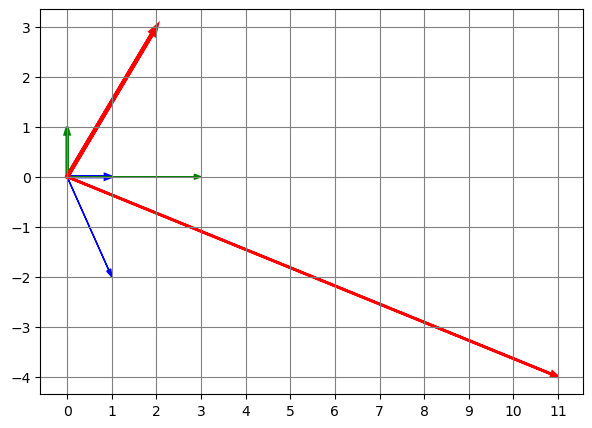

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.arrow(0,0, 1,0, head_width=0.1, color='blue', length_includes_head=True,lw=2)
ax.arrow(0,0, 1,-2, head_width=0.1, color='blue', length_includes_head=True)
ax.arrow(0,0, 3,0, head_width=0.1, color='green', length_includes_head=True)
ax.arrow(0,0, 0,1, head_width=0.1, color='green', length_includes_head=True,lw=2)

ax.arrow(0,0, 2,3, head_width=0.1, color='red', length_includes_head=True,lw=3)
ax.arrow(0,0, 11,-4, head_width=0.1, color='red', length_includes_head=True,lw=2)

ax.set_xticks([0,1, 2, 3, 4,5, 6, 7, 8, 9, 10, 11])
ax.set_yticks(list(range(-4, 4)))
ax.grid(color='grey')

In [17]:
M4[0] * x_new + M4[1] * y_new

[11  -4]

In [19]:
basis_90_gr = sym.Matrix([[0, -1], [1, 0]])
Vec = sym.Matrix([2, 3])
## Координаты нового базиса после трансформации
## (поворот на 90 градусов против часовой стрелки)
basis_90_gr

⎡0  -1⎤
⎢     ⎥
⎣1  0 ⎦

In [20]:
basis_90_gr * Vec

⎡-3⎤
⎢  ⎥
⎣2 ⎦

Нужно посчитать новые координаты вектора $\begin{bmatrix}3 \\ -2\end{bmatrix} $ 

$\begin{bmatrix}1  & -1\\1  &0 \end{bmatrix} (   \begin{bmatrix}0 & -1\\1  & 0\end{bmatrix} \begin{bmatrix}x \\ y\end{bmatrix})$

In [21]:
## f(g(x))
Vec_2 = sym.Matrix([3, -2])
skos = sym.Matrix([[1, -1], [1, 0]])
skos * (basis_90_gr * Vec_2) 

⎡-1⎤
⎢  ⎥
⎣2 ⎦

In [22]:
## skos @ basis_90_gr не равно basis_90_gr @ skos
res = (skos @ basis_90_gr) * Vec_2
res

⎡-1⎤
⎢  ⎥
⎣2 ⎦

In [23]:
skos * basis_90_gr

⎡-1  -1⎤
⎢      ⎥
⎣0   -1⎦

In [24]:
# Получаем обратную матрицу
inv_skos_90_gr = (skos * basis_90_gr).inv()
inv_skos_90_gr

⎡-1  1 ⎤
⎢      ⎥
⎣0   -1⎦

In [25]:
# Получаем координаты вектора до трансформации с помощью обратной матрицы
inv_skos_90_gr * res 

⎡3 ⎤
⎢  ⎥
⎣-2⎦

### Формула обратной матрицы
### $B^{-1} = \frac{1}{det(B)} * A^{*T}$, где $A_{ij} = (-1)^{i+j}*M_{ij}$

In [26]:
### Найти обратную матрицу для матрицы B
B = Matrix(3, 3 , [2, 5, 7, 6, 3, 4, 5, -2, -3])
B

⎡2  5   7 ⎤
⎢         ⎥
⎢6  3   4 ⎥
⎢         ⎥
⎣5  -2  -3⎦

In [27]:
A = Matrix.zeros(3)
A

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

In [28]:
for i in range(3):
    for j in range(3):
        A[i, j] = (-1) ** (i + j) * B.minor(i, j)
A

⎡-1  38   -27⎤
⎢            ⎥
⎢1   -41  29 ⎥
⎢            ⎥
⎣-1  34   -24⎦

In [29]:
B_inv = sym.S(1) / B.det() * A.T
B_inv

⎡ 1   -1    1 ⎤
⎢             ⎥
⎢-38  41   -34⎥
⎢             ⎥
⎣27   -29  24 ⎦

In [30]:
B.inv()  # функция для получения обратной матрицы

⎡ 1   -1    1 ⎤
⎢             ⎥
⎢-38  41   -34⎥
⎢             ⎥
⎣27   -29  24 ⎦

In [31]:
B * B.inv() ## B * B.inv == I

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

#### Скалярное произведение матриц MxN * NxK = MxK
$\begin{bmatrix}a  & b\\c  & d \end{bmatrix}    \begin{bmatrix}e & f\\g  & h\end{bmatrix} = \begin{bmatrix}ae + bg & ce + dg\\ af + bh & cf + dh\end{bmatrix}$

 $ A^{-1} * A = E$ 

###### Ассоциативность матриц
(A * B) * C = A * (B * C)

In [32]:
A = sym.Matrix([[1, 3], [2, 4]])
B = sym.Matrix([[5, 7], [6, 8]])
C = sym.Matrix([[3, 3], [1, 4]])


In [33]:
(A * B) * C  ## скалярное произведение

⎡100  193⎤
⎢        ⎥
⎣148  286⎦

In [34]:
A * (B * C)  

⎡100  193⎤
⎢        ⎥
⎣148  286⎦

In [35]:
np.dot(A, B)  ## Скалярное произведение векторов

array([[23, 31],
       [34, 46]], dtype=object)

### Ранг матрицы

In [36]:
B1 = Matrix(3, 3 , [2, 5, 7, 6, 3, 4, 5, -2, -3])
B1

⎡2  5   7 ⎤
⎢         ⎥
⎢6  3   4 ⎥
⎢         ⎥
⎣5  -2  -3⎦

In [37]:
B1.rank()

In [38]:
B2 = Matrix(3, 3 , [2, 5, 7, 6, 3, 4, 12, 6, 8])
B2

⎡2   5  7⎤
⎢        ⎥
⎢6   3  4⎥
⎢        ⎥
⎣12  6  8⎦

In [39]:
B2.rank()

In [40]:
B2.det()

#### Решение систем линейных уравнений
$2x + 5y + 3z = -3 \\
4x + 0y + 8z = 0 \\
1x + 3y + 0z = 2$

In [41]:
A = sym.Matrix([[2, 5, 3], [4, 0, 8], [1, 3, 0]]); A

⎡2  5  3⎤
⎢       ⎥
⎢4  0  8⎥
⎢       ⎥
⎣1  3  0⎦

In [42]:
 b = sym.Matrix([-3, 0, 2]); b

⎡-3⎤
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎣2 ⎦

In [43]:
x, y, z = sym.symbols('x y z')
X = sym.Matrix([x, y, z]); X

⎡x⎤
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣z⎦

#### Формулы
$ A^{-1} * A = E \\
A*X = b \\
X = A^{-1}*b $


In [44]:
# Итоговый вектор X
result = A.inv() * b; result

⎡38/7 ⎤
⎢     ⎥
⎢-8/7 ⎥
⎢     ⎥
⎣-19/7⎦

In [45]:
np_A = np.array(A, dtype=np.int64)  ## Обязательно нужно преобразовать тип данных
np_v = np.array(b, dtype=np.int64)
np.linalg.solve(np_A, np_v)  # решение СЛУ с помощью solve()

array([[ 5.42857143],
       [-1.14285714],
       [-2.71428571]])

In [46]:
import scipy.linalg as scl

In [47]:
scl.solve(np_A, np_v)

array([[ 5.42857143],
       [-1.14285714],
       [-2.71428571]])

### Задача №2
$\begin{cases} 
 2x_1 − 2x_2 − 3x_3 − 2x_4 = 0 \\
x_1 − x_2 + 2x_3 + x_4 = − 2 \\
− 2x_1 + x_2 − x_3 + x_4 = − 1 \\
x_1 − 2x_2 + 2x_3 + x_4 = − 4
 \end{cases}$

In [48]:
x1, x2, x3, x4 = sym.symbols('x_1 x_2 x_3 x_4')

In [49]:
## расширенная матрица(добавили столбец 'b')
syst = sym.Matrix([2 * x1 - 2 * x2 -  3 * x3 - 2 * x4,
        x1 - x2 + 2 * x3 + x4 + 2,
        -2 * x1 + x2 - x3 + x4 + 1,
        x1 - 2 * x2 + 2 * x3 + x4 + 4])
syst

⎡2⋅x₁ - 2⋅x₂ - 3⋅x₃ - 2⋅x₄⎤
⎢                         ⎥
⎢ x₁ - x₂ + 2⋅x₃ + x₄ + 2 ⎥
⎢                         ⎥
⎢-2⋅x₁ + x₂ - x₃ + x₄ + 1 ⎥
⎢                         ⎥
⎣x₁ - 2⋅x₂ + 2⋅x₃ + x₄ + 4⎦

In [50]:
sym.linsolve(syst, (x1, x2, x3, x4))  # для СЛУ используем linsolve()

### Oпределение

__Линейное__ (векторное) __пространство__ $V$ над полем $F$ - это множество (элементы $V$ называют векторами, а элементы поля $F$ скалярами), для которого определены две операции:

1. Операция сложения векторов $V×V→V$, эта операция ставит в соответствие произвольной паре векторов $x$ и $y$ из $V$ единственный элемент $z=x+y$ из того же множества $V$ (т.е. тоже являющийся вектором), называемый их суммой.
Это значит, что в векторном пространстве вектора можно складывать, и результатом суммы будет вектор.
2. Операция умножения векторов на скаляры $V×F→V$ ставит в соответствие произвольному скаляру $a∈F$ и произвольному вектору $x∈V$ единственный элемент (вектор) $p=a⋅x=ax∈V$, т.е. в векторном пространстве вектора можно умножать на скаляры из поля (напр. числа) и получать в качестве результата такого произведения вектор.

### Аксиомы

1. Коммутативность сложения: $x+y=y+x$ для любых $x,y∈V$ (т.е. порядок слагаемых не имеет значения)  
2. Ассоциативность сложения: $(x+y)+z=x+(y+z)$ для любых $x,y,z \in V$  
3. Существование нулевого вектора: существует вектор $0 ∈ V$ такой, что $x+0=0+x=x$ для любого $x ∈ V$, такой элемент также называют нулём пространства $V$.  
4. Существование противоположного элемента: для любого вектора $x∈V$ существует такой элемент $−x$, что $x+(−x)=0$. Элемент −x называется противоположным элементу x.  
5. Ассоциативность умножения на скаляр: $(αβ)x=α(βx)$, для любых $x ∈ V$ и $α,β ∈ F$.  
6. Существование нейтрального по умножению скаляра:  
существует некоторый элемент, обозначим его как 1 (причем $1∈F$), такой что $1⋅x=x,∀x \in V$ (при умножении на такой элемент, который можно назвать "единичным", вектор сохраняется неизменным)
7. $(α+β)x=αx+βx$ (дистрибутивность умножения вектора на скаляр относительно сложения скаляров)
8. $α(x+y)=αx+αy$ (дистрибутивность умножения вектора на скаляр относительно сложения векторов)

#### Задача
Найти собственные значения матрицы $ \begin{pmatrix} 1 & -1\\ 1 & 3  \end{pmatrix} $

In [51]:
sym.init_printing()
M = sym.Matrix(2, 2, [1, -1, 1, 3]); M
print(M.eigenvals(multiple=True))
M.eigenvects()

[2, 2]


⎡⎛      ⎡⎡-1⎤⎤⎞⎤
⎢⎜2, 2, ⎢⎢  ⎥⎥⎟⎥
⎣⎝      ⎣⎣1 ⎦⎦⎠⎦

In [62]:
M

⎡1  -1⎤
⎢     ⎥
⎣1  3 ⎦

In [63]:
2 * sym.eye(2)

⎡2  0⎤
⎢    ⎥
⎣0  2⎦

In [64]:
(M - 2 * sym.eye(2)).det()

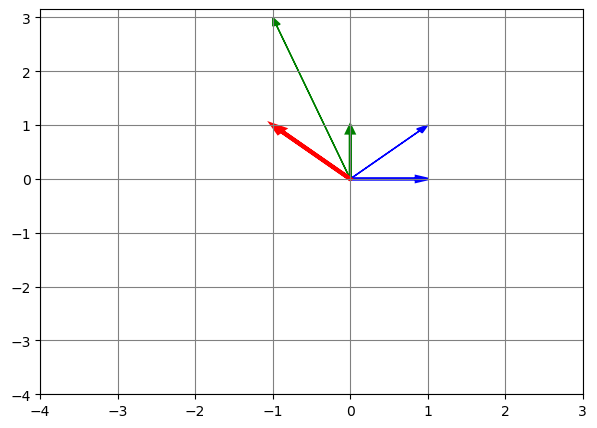

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.arrow(0,0, 1,0, head_width=0.1, color='blue', length_includes_head=True,lw=2)
ax.arrow(0,0, 1, 1, head_width=0.1, color='blue', length_includes_head=True)
ax.arrow(0,0, 0,1, head_width=0.1, color='green', length_includes_head=True,lw=2)
ax.arrow(0,0, -1,3, head_width=0.1, color='green', length_includes_head=True)
ax.arrow(0,0, -1,1, head_width=0.1, color='red', length_includes_head=True, lw=3)

ax.set_xticks(list(range(-4, 4)))
ax.set_yticks(list(range(-4, 4)))
ax.grid(color='grey')